In [1]:
import os
import sys
import gc
# assuming data, models, engine in flicc directory:
flicc_path = os.path.realpath("__file__").split('grid_search')[0]
sys.path.append(flicc_path)
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='microsoft/deberta-base'

In [3]:
results = {'test_acc':[],
           'test_f1':[],
           'eval_acc':[],
           'eval_f1':[],
           'g':[]}

In [4]:
gamma = [2,4,8,16]
lr = 5.0e-5

for g in gamma:
    print(f'Grid search {model_checkpoint}, learning rate {lr}, focal loss gamma {g}')
    data = ClimateDataset(model_to_train=3,model_checkpoint=model_checkpoint,dataset_url=flicc_path,batch_size=32)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
    trainer = Engine(epochs=30,labels=data.labels)
    trainer.model = model.model
    trainer.dataset_encoded = data.dataset_encoded
    test_acc, test_f1, eval_acc, eval_f1 = trainer.run(lr=lr,
                                                       wd=0.0,
                                                       train_dataloader=data.train_dataloader,
                                                       eval_dataloader=data.eval_dataloader,
                                                       test_dataloader=data.test_dataloader,
                                                       focalloss=True,
                                                       gamma=g,
                                                       early_stop=3)
    results['test_acc'].append(test_acc)
    results['test_f1'].append(test_f1)
    results['eval_acc'].append(eval_acc)
    results['eval_f1'].append(eval_f1)
    results['g'].append(g)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, test_acc, test_f1, eval_acc, eval_f1
    gc.collect()

Grid search microsoft/deberta-base, learning rate 5e-05, focal loss gamma 2


Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a DebertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	11.5825	Val Loss:	1.3859	Accuracy:	0.5414	F1:	0.5228
2 / 30: Train Loss:	4.8289	Val Loss:	1.0539	Accuracy:	0.6598	F1:	0.6353
3 / 30: Train Loss:	2.1300	Val Loss:	1.0962	Accuracy:	0.5976	F1:	0.5834
4 / 30: Train Loss:	1.0732	Val Loss:	0.9206	Accuracy:	0.7160	F1:	0.7040
5 / 30: Train Loss:	0.3111	Val Loss:	0.7437	Accuracy:	0.7544	F1:	0.7538
6 / 30: Train Loss:	0.1417	Val Loss:	0.7667	Accuracy:	0.7219	F1:	0.7039
7 / 30: Train Loss:	0.0682	Val Loss:	0.7488	Accuracy:	0.7485	F1:	0.7344
8 / 30: Train Loss:	0.0743	Val Loss:	0.7848	Accuracy:	0.7426	F1:	0.7206
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                         precision    recall  f1-score   support

             ad hominem       0.78      0.73      0.75        67
               anecdote       0.85      0.81      0.83        43
         cherry picking       0.69      0.75      0.72        56
      conspiracy theory       0.75      0.77      0.76        39
         

Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a DebertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	8.7991	Val Loss:	1.4700	Accuracy:	0.5030	F1:	0.4789
2 / 30: Train Loss:	3.4404	Val Loss:	1.2564	Accuracy:	0.5858	F1:	0.5485
3 / 30: Train Loss:	1.5011	Val Loss:	0.9783	Accuracy:	0.6893	F1:	0.6608
4 / 30: Train Loss:	0.5749	Val Loss:	1.0011	Accuracy:	0.6893	F1:	0.6868
5 / 30: Train Loss:	0.1757	Val Loss:	0.8022	Accuracy:	0.7515	F1:	0.7536
6 / 30: Train Loss:	0.0786	Val Loss:	0.7989	Accuracy:	0.7426	F1:	0.7472
7 / 30: Train Loss:	0.0304	Val Loss:	0.7700	Accuracy:	0.7278	F1:	0.7286
8 / 30: Train Loss:	0.0172	Val Loss:	0.7713	Accuracy:	0.7485	F1:	0.7464
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                         precision    recall  f1-score   support

             ad hominem       0.72      0.76      0.74        67
               anecdote       0.88      0.81      0.84        43
         cherry picking       0.73      0.73      0.73        56
      conspiracy theory       0.79      0.77      0.78        39
          

Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a DebertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	7.5975	Val Loss:	1.9135	Accuracy:	0.3432	F1:	0.2942
2 / 30: Train Loss:	3.2555	Val Loss:	1.4081	Accuracy:	0.5473	F1:	0.5192
3 / 30: Train Loss:	1.0412	Val Loss:	1.1693	Accuracy:	0.6775	F1:	0.6335
4 / 30: Train Loss:	0.4900	Val Loss:	1.1330	Accuracy:	0.6095	F1:	0.6062
5 / 30: Train Loss:	0.2004	Val Loss:	1.0859	Accuracy:	0.6361	F1:	0.6494
6 / 30: Train Loss:	0.1331	Val Loss:	0.9542	Accuracy:	0.7160	F1:	0.6656
7 / 30: Train Loss:	0.0504	Val Loss:	0.9483	Accuracy:	0.7219	F1:	0.7111
8 / 30: Train Loss:	0.0156	Val Loss:	0.9014	Accuracy:	0.7101	F1:	0.6731
9 / 30: Train Loss:	0.0124	Val Loss:	0.9004	Accuracy:	0.7249	F1:	0.6890
10 / 30: Train Loss:	0.0067	Val Loss:	0.8661	Accuracy:	0.7012	F1:	0.6674
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                         precision    recall  f1-score   support

             ad hominem       0.65      0.76      0.70        67
               anecdote       0.97      0.81      0.89      

Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a DebertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	2.0752	Val Loss:	1.7016	Accuracy:	0.4941	F1:	0.4835
2 / 30: Train Loss:	0.6107	Val Loss:	1.4735	Accuracy:	0.5533	F1:	0.5087
3 / 30: Train Loss:	0.2171	Val Loss:	1.3011	Accuracy:	0.6213	F1:	0.6263
4 / 30: Train Loss:	0.0470	Val Loss:	1.2120	Accuracy:	0.6834	F1:	0.6658
5 / 30: Train Loss:	0.0150	Val Loss:	1.1242	Accuracy:	0.7249	F1:	0.7280
6 / 30: Train Loss:	0.0080	Val Loss:	1.0990	Accuracy:	0.7041	F1:	0.6978
7 / 30: Train Loss:	0.0043	Val Loss:	1.0831	Accuracy:	0.7278	F1:	0.7189
8 / 30: Train Loss:	0.0026	Val Loss:	1.0737	Accuracy:	0.7426	F1:	0.7358
9 / 30: Train Loss:	0.0022	Val Loss:	1.0601	Accuracy:	0.7308	F1:	0.7210
10 / 30: Train Loss:	0.0016	Val Loss:	1.0501	Accuracy:	0.7396	F1:	0.7366
11 / 30: Train Loss:	0.0012	Val Loss:	1.0374	Accuracy:	0.7337	F1:	0.7272
12 / 30: Train Loss:	0.0011	Val Loss:	1.0272	Accuracy:	0.7308	F1:	0.7250
13 / 30: Train Loss:	0.0021	Val Loss:	1.0188	Accuracy:	0.7367	F1:	0.7330
No improvement for 3 epochs. Stopping early.
best (higgest m

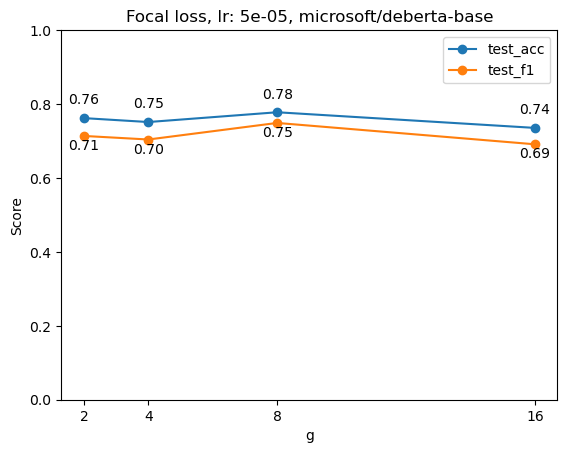

In [5]:
Engine.plot_grid_search(df=results,
                        title=f'Focal loss, lr: {lr}, {model_checkpoint}',
                        column='g',
                        sci_format=False)

In [6]:
%reset -f